# [Day 17](https://adventofcode.com/2023/day/17)


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import heapq
from typing import Callable

In [2]:
fNames = ["input", "test"]
with open(fNames[0]) as f:
    input = [list(map(int, l.strip("\n"))) for l in f.readlines()]

surface_org = np.array(input)
len(input), surface_org, surface_org.shape

(141,
 array([[1, 2, 1, ..., 5, 2, 3],
        [2, 3, 1, ..., 4, 3, 2],
        [2, 5, 5, ..., 6, 1, 5],
        ...,
        [1, 6, 6, ..., 2, 4, 6],
        [2, 4, 1, ..., 6, 4, 3],
        [5, 2, 5, ..., 4, 3, 4]]),
 (141, 141))

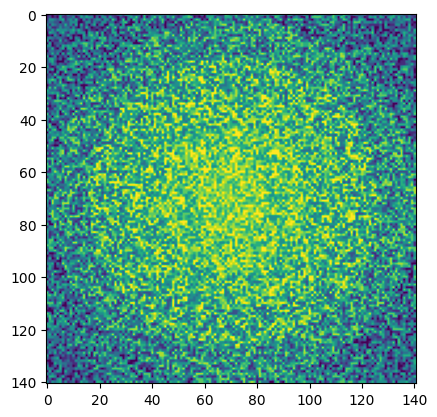

In [3]:
plt.imshow(surface_org)

In [4]:
def is_inbound(ndarr: np.ndarray, coord: tuple):
    r, c = coord
    w, h = ndarr.shape
    return 0 <= r < h and 0 <= c < w


tests = [(-1, -1), (0, 0), tuple(surface_org.shape), (12, 12), (5, 5)]
list(zip(map(lambda x: is_inbound(surface_org, x), tests), tests))

[(False, (-1, -1)),
 (True, (0, 0)),
 (False, (141, 141)),
 (True, (12, 12)),
 (True, (5, 5))]

In [5]:
def move(row, col, direction, indir, i, new_dir):
    delta_row, delta_col = new_dir
    new_row = row + delta_row
    new_col = col + delta_col
    new_dir = i
    new_indir = 1 if new_dir != direction else indir + 1
    return new_row, new_col, new_dir, new_indir


def get_shortest_dist(shape: tuple, memo: dict):
    ans = 1e9
    w, h = shape
    for (row, col, _, _), v in memo.items():
        if row == h - 1 and col == w - 1:
            ans = min(ans, v)
    return ans


def isnt_reverse(new_dir, direction):
    return (new_dir + 2) % 4 != direction

In [6]:
def solve(ndarr: np.ndarray, rule: Callable[[tuple], bool]):
    queue = [(0, 0, 0, -1, -1)]
    memo = {}
    while queue:
        dist, row, col, direction, indir = heapq.heappop(queue)
        key = row, col, direction, indir
        if key in memo:
            continue
        memo[key] = dist
        for i, delta in enumerate([[-1, 0], [0, 1], [1, 0], [0, -1]]):
            new_row, new_col, new_dir, new_indir = move(*key, i, delta)

            if (
                is_inbound(ndarr, (new_row, new_col))
                and isnt_reverse(new_dir, direction)
                and rule((new_indir, new_dir, direction, indir))
            ):
                cost = ndarr[new_row, new_col]
                if (new_row, new_col, new_dir, new_indir) in memo:
                    continue
                heapq.heappush(
                    queue, (dist + cost, new_row, new_col, new_dir, new_indir)
                )

    return memo


res = solve(surface_org, lambda x: x[0] <= 3)
len(res), get_shortest_dist(surface_org.shape, res)

(235189, 1013)

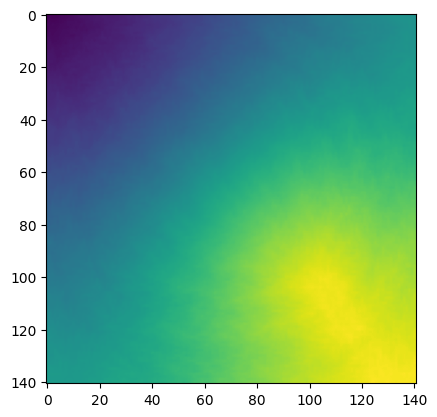

In [7]:
img = np.zeros(surface_org.shape)
for row, col, value in [(r, c, v) for (r, c, _, _), v in res.items()]:
    img[row, col] = value
plt.imshow(img)

## Part 2


In [8]:
def part2_rule(x):
    new_indir, new_dir, direction, indir = x
    return new_indir <= 10 and (new_dir == direction or indir >= 4 or indir == -1)


res = solve(surface_org, part2_rule)
len(res)

764221

In [9]:
def get_shortest_dist_pt2(shape: tuple, memo: dict):
    ans = 1e9
    w, h = shape
    for (row, col, _, indir), v in memo.items():
        if row == h - 1 and col == w - 1 and indir >= 4:
            ans = min(ans, v)

get_shortest_dist(surface_org.shape, res)

1213

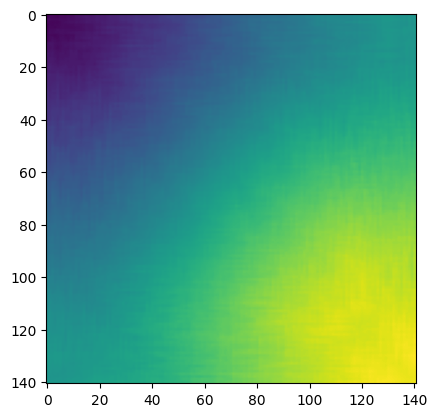

In [10]:
img = np.zeros(surface_org.shape)
for row, col, value in [(r, c, v) for (r, c, _, _), v in res.items()]:
    img[row, col] = value
plt.imshow(img)